In [1]:
# Customer Churn Project

In [2]:
# Install required libraries if not already installed (for Colab)
!pip install -q matplotlib seaborn scikit-learn pandas

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score


In [4]:
from google.colab import files
uploaded=files.upload()

Saving customer_churn.csv to customer_churn.csv


In [5]:
# Load the dataset
df = pd.read_csv('customer_churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Extract the 5th and 15th columns
customer_5 = df.iloc[:, 4]
customer_15 = df.iloc[:, 14]

# Extract male senior citizens with Electronic check
senior_male_electronic = df[(df['gender'] == 'Male') &
                            (df['SeniorCitizen'] == 1) &
                            (df['PaymentMethod'] == 'Electronic check')]

# Customers with tenure > 70 or MonthlyCharges > 100
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]

# Customers with 2-year contract, Mailed check, and Churn = Yes
two_mail_yes = df[(df['Contract'] == 'Two year') &
                  (df['PaymentMethod'] == 'Mailed check') &
                  (df['Churn'] == 'Yes')]

# 333 random records
customer_333 = df.sample(n=333, random_state=42)

# Count of different levels in Churn
churn_count = df['Churn'].value_counts()
print(churn_count)


Churn
No     5174
Yes    1869
Name: count, dtype: int64


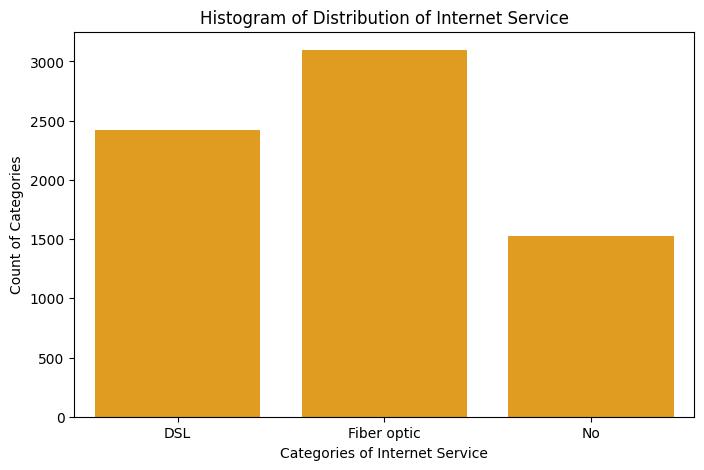

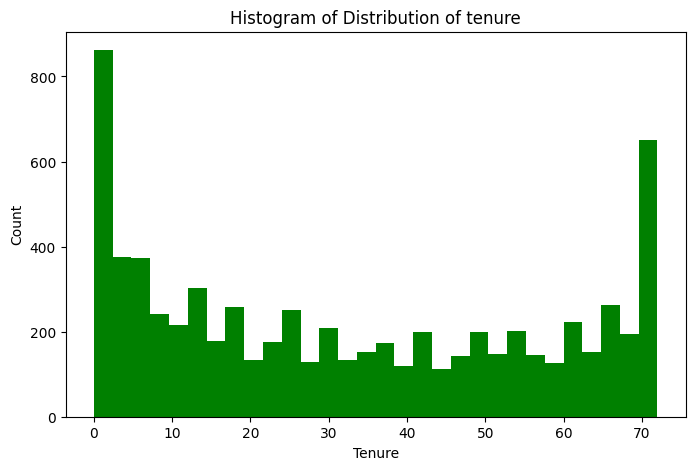

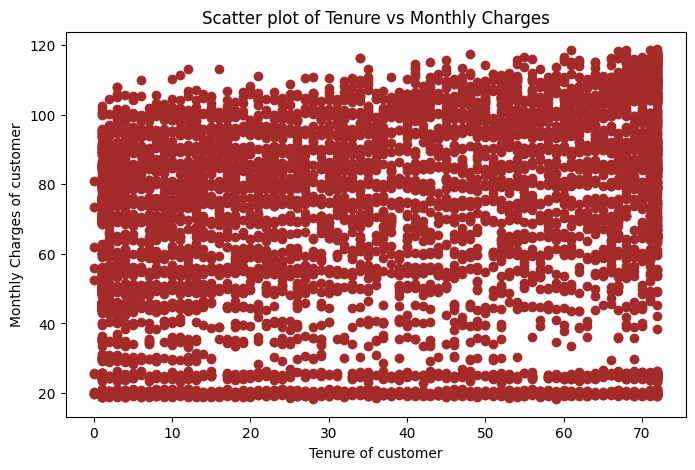

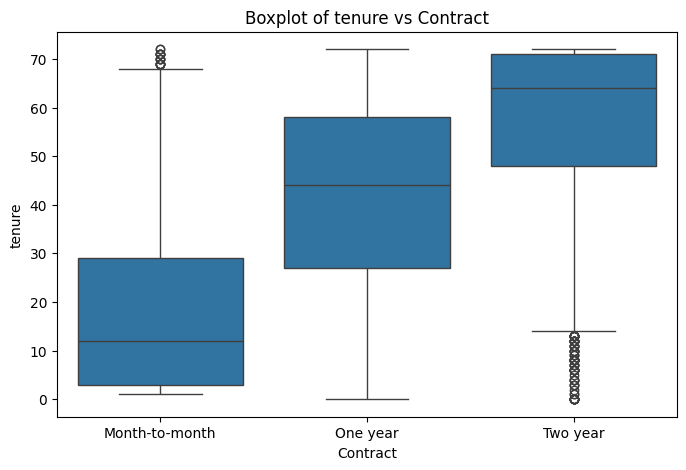

In [8]:
# Bar plot for InternetService
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', data=df, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Histogram of Distribution of Internet Service')
plt.show()

# Histogram for tenure
plt.figure(figsize=(8,5))
plt.hist(df['tenure'], bins=30, color='green')
plt.title('Histogram of Distribution of tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

# Scatter plot: MonthlyCharges vs tenure
plt.figure(figsize=(8,5))
plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Scatter plot of Tenure vs Monthly Charges')
plt.show()

# Box plot: tenure vs Contract
plt.figure(figsize=(8,5))
sns.boxplot(x='Contract', y='tenure', data=df)
plt.title('Boxplot of tenure vs Contract')
plt.show()


In [9]:
# Simple linear regression: MonthlyCharges ~ tenure
X = df[['tenure']]
y = df['MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# Error
error = y_test - y_pred
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 29.15550989402921


In [13]:
# Encode Churn column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Simple logistic regression: Churn ~ MonthlyCharges
X = df[['MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print('Accuracy (Simple Logistic):', accuracy_score(y_test, y_pred))
print('Confusion matrix : ', confusion_matrix(y_test, y_pred))

# Multiple logistic regression: Churn ~ tenure + MonthlyCharges
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print('Accuracy (Multiple Logistic):', accuracy_score(y_test, y_pred))
print('Confusion matrix :',confusion_matrix(y_test, y_pred))

Accuracy (Simple Logistic): 0.7461476074614761
Confusion matrix :  [[1840    0]
 [ 626    0]]
Accuracy (Multiple Logistic): 0.7970191625266146
Confusion matrix : [[965  96]
 [190 158]]


In [14]:
# Decision Tree: Churn ~ tenure
X = df[['tenure']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

print('Accuracy (Decision Tree):', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))


Accuracy (Decision Tree): 0.7643718949609652
Confusion Matrix: [[983  78]
 [254  94]]


In [16]:
# Random Forest: Churn ~ tenure + MonthlyCharges
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print('Accuracy (Random Forest):', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))


Accuracy (Random Forest): 0.7614765735920492
Confusion Matrix: [[1357  228]
 [ 276  252]]
